In [1]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
f = 10 # Frequency, in cycles per second, or Hertz
f_s = 1000 # Sampling rate, the number of data points per second
Duration = 1 #second
N = Duration * f_s # total number of data points
t = np.linspace(0, Duration, N, endpoint=False) # an array of timepoints
x = np.sin(2 * np.pi * f * t) # the signal is sampled from a sine function

print('x has N data points sampled from sin(2*3.14*f*t), f=10Hz, f_s is 1000Hz')
print('N = Duration * f_s =', N)
print('t.shape', t.shape)
print('x.shape', x.shape)
print('np.pi =', np.pi)

x has N data points sampled from sin(2*3.14*f*t), f=10Hz, f_s is 1000Hz
N = Duration * f_s = 1000
t.shape (1000,)
x.shape (1000,)
np.pi = 3.141592653589793


Text(0.5, 1.0, 'Signal x is sampled from sin(2*3.14*f*t), f=10Hz, f_s is 1000 Hz')

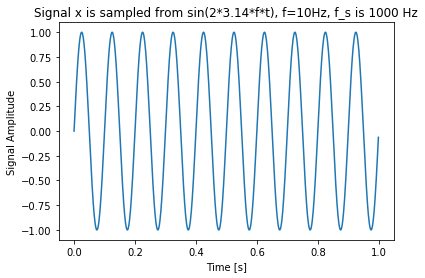

In [3]:
fig, ax = plt.subplots()
ax.plot(t, x, '-')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('Signal x is sampled from sin(2*3.14*f*t), f=10Hz, f_s is 1000 Hz')

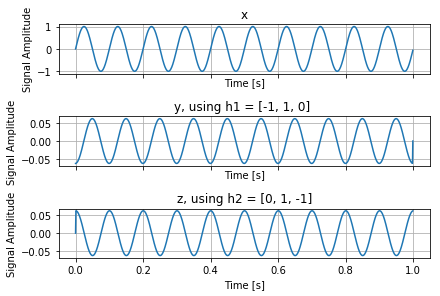

In [4]:
import scipy
import scipy.ndimage

h1 = [-1, 1, 0] # convolution kernel-1 for peak detection
h2 = [0, 1, -1] # convolution kernel-2 for peak detection

y = scipy.ndimage.convolve(x, h1, mode='nearest')
z = scipy.ndimage.convolve(x, h2, mode='nearest')
fig, ax = plt.subplots(3, 1, sharex=True, constrained_layout=True)
ax[0].plot(t, x, '-')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Signal Amplitude')
ax[0].set_title('x')
ax[0].grid(True)
ax[1].plot(t, y, '-')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Signal Amplitude')
ax[1].set_title('y, using h1 = [-1, 1, 0] ')
ax[1].grid(True)
ax[2].plot(t, z, '-')
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Signal Amplitude')
ax[2].set_title('z, using h2 = [0, 1, -1]')
ax[2].grid(True)

In [5]:
IndexArray1= np.where(y>0) #find the indexes of the positive elements in y
IndexArray2= np.where(z>0) #find the indexes of the positive elements in z
PeakIndexArray = np.intersect1d(IndexArray1, IndexArray2) # find the intersection of IndexArray1 and IndexArray2

In [6]:
PeakIndexArray

array([ 25, 125, 225, 325, 425, 525, 625, 725, 825, 925], dtype=int64)

In [7]:
t[PeakIndexArray] # timeponts of the peaks

array([0.025, 0.125, 0.225, 0.325, 0.425, 0.525, 0.625, 0.725, 0.825,
       0.925])

In [8]:
x[PeakIndexArray] # amplitdue values of the peaks

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

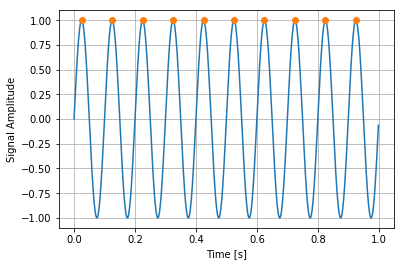

In [9]:
fig, ax = plt.subplots()
ax.plot(t, x, '-') # '-' to connect points with lines
ax.plot(t[PeakIndexArray], x[PeakIndexArray], 'o') # 'o' to plot dots only
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.grid(True)

Usually, a signal contains noise <br>
Now, let's add some random noise to the signal x <br>
then find the peaks of the noisy signal x_noisy

In [10]:
x_noisy = x + np.random.rand(x.shape[0]) # add some noise to the clean signal x

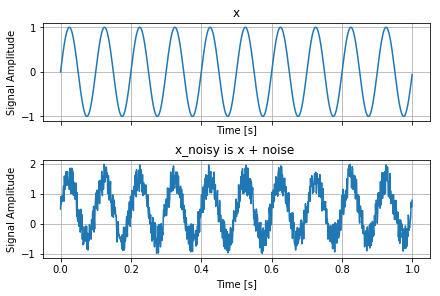

In [11]:
fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True)
ax[0].plot(t, x, '-')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Signal Amplitude')
ax[0].set_title('x')
ax[0].grid(True)
ax[1].plot(t, x_noisy, '-')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Signal Amplitude')
ax[1].set_title('x_noisy is x + noise ')
ax[1].grid(True)

Let's apply the peak detection algorithm on x_noisy 

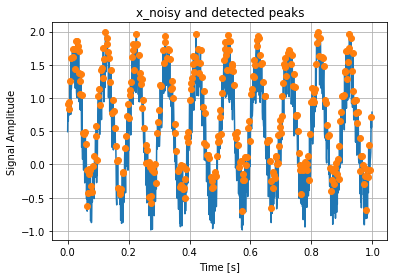

In [12]:
h1 = [-1, 1, 0] # convolution kernel-1 for peak detection
h2 = [0, 1, -1] # convolution kernel-2 for peak detection
y = scipy.ndimage.convolve(x_noisy, h1, mode='nearest')
z = scipy.ndimage.convolve(x_noisy, h2, mode='nearest')

IndexArray1 = np.where(y>0) #find the indexes of the positive elements in y
IndexArray2 = np.where(z>0) #find the indexes of the positive elements in z
PeakIndexArray = np.intersect1d(IndexArray1, IndexArray2) # find the intersection of IndexArray1 and IndexArray2

fig, ax = plt.subplots()
ax.plot(t, x_noisy, '-')
ax.plot(t[PeakIndexArray], x_noisy[PeakIndexArray], 'o')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('x_noisy and detected peaks')
ax.grid(True)

Let's reduce the noise in x_noisy using convolution with a moving average (weighted) kernal

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


(-0.05, 0.05)

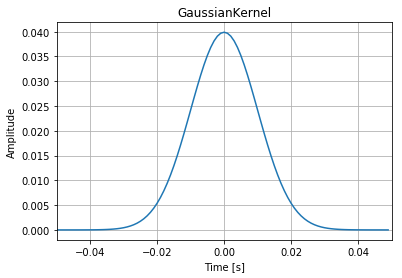

In [13]:
tg = np.linspace(-0.05, 0.05, (0.05+0.05)*f_s, endpoint=False) # an array of timepoints, duration is 0.1 s
sigma=0.01
GaussianKernel = np.exp(-tg**2/(2*sigma**2))
GaussianKernel/=GaussianKernel.sum()
#plot the kernal
fig, ax = plt.subplots()
ax.plot(tg, GaussianKernel, '-')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.grid(True)
ax.set_title('GaussianKernel')
ax.set_xlim([-0.05, 0.05])

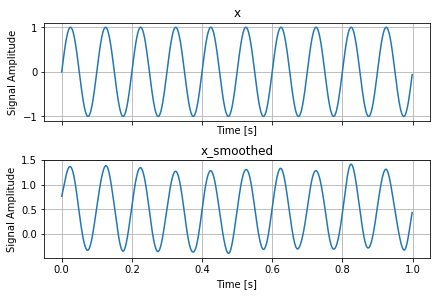

In [14]:
x_smoothed = scipy.ndimage.convolve(x_noisy, GaussianKernel, mode='nearest')
#
fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True)
ax[0].plot(t, x, '-')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Signal Amplitude')
ax[0].set_title('x')
ax[0].grid(True)
ax[1].plot(t, x_smoothed, '-')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Signal Amplitude')
ax[1].set_title('x_smoothed')
ax[1].grid(True)

Let's apply the peak detection algorithm on x_smoothed 

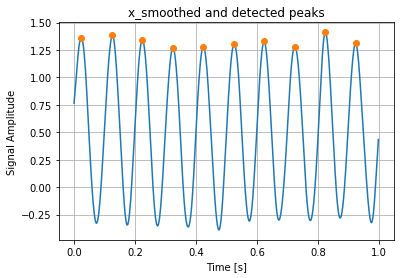

In [15]:
h1 = [-1, 1, 0] # convolution kernel-1 for peak detection
h2 = [0, 1, -1] # convolution kernel-2 for peak detection
y1 = scipy.ndimage.convolve(x_smoothed, h1, mode='nearest')
y2 = scipy.ndimage.convolve(x_smoothed, h2, mode='nearest')

IndexArray1= np.where(y1>0) #find the indexes of the positive elements in y1
IndexArray2= np.where(y2>0) #find the indexes of the positive elements in y2
PeakIndexArray = np.intersect1d(IndexArray1, IndexArray2) # find the intersection of IndexArray1 and IndexArray2

fig, ax = plt.subplots()
ax.plot(t, x_smoothed, '-')
ax.plot(t[PeakIndexArray], x_smoothed[PeakIndexArray], 'o')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('x_smoothed and detected peaks')
ax.grid(True)

Visualize x, x_noisy, x_smooth, peaks

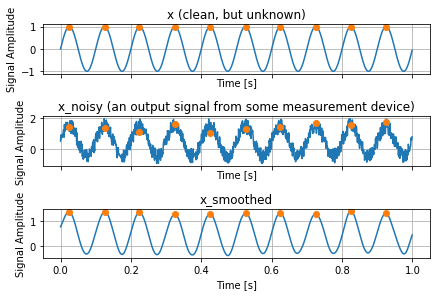

In [16]:
fig, ax = plt.subplots(3, 1, sharex=True, constrained_layout=True)
ax[0].plot(t, x, '-')
ax[0].plot(t[PeakIndexArray], x[PeakIndexArray], 'o')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Signal Amplitude')
ax[0].set_title('x (clean, but unknown)')
ax[0].grid(True)
ax[1].plot(t, x_noisy, '-')
ax[1].plot(t[PeakIndexArray], x_noisy[PeakIndexArray], 'o')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Signal Amplitude')
ax[1].set_title('x_noisy (an output signal from some measurement device)')
ax[1].grid(True)
ax[2].plot(t, x_smoothed, '-')
ax[2].plot(t[PeakIndexArray], x_smoothed[PeakIndexArray], 'o')
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Signal Amplitude')
ax[2].set_title('x_smoothed')
ax[2].grid(True)